# 任务1：论文数据统计

【情况说明】助教您好，由于我还参加了上一期的pandas组队学习，它的最终大作业正好和本次学习的任务一时间上有冲突，所以这次作业可能完成得不太理想，望多多包涵。

## 任务说明

本次任务的主题是：统计**2019**年计算机各个方向**论文数量**。

数据来源：https://www.kaggle.com/Cornell-University/arxiv

##  具体代码实现

### 导入package并读取数据

In [1]:
# 导入所需的package
import seaborn as sns #用于画图
from bs4 import BeautifulSoup #用于爬取arxiv的数据
import re #用于正则表达式，匹配字符串的模式
import requests #用于网络连接，发送网络请求，使用域名获取对应信息
import json #读取数据，我们的数据为json格式的
import pandas as pd #数据处理，数据分析
import matplotlib.pyplot as plt #画图工具

C:\Users\LWKM\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# 读入数据
data  = []
# 读取前100行
with open("./arxiv-metadata-oai-snapshot.json",'r') as f:
    for idx, line in enumerate(f):
        if idx >= 100:
            break
        # 写入数据
        data.append(json.loads(line))
# 转换数据格式
data = pd.DataFrame(data)

读取文件使用了`with`语句，其优势在于：

1. 自动关闭文件句柄；
2. 自动显示（处理）文件读取数据异常。

In [3]:
# 显示数据大小
data.shape

(100, 14)

In [4]:
# 显示数据前五行
data.head()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,0704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,None,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,..."
1,0704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,None,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]"
2,0704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",None,None,None,physics.gen-ph,None,The evolution of Earth-Moon system is descri...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-01-13,"[[Pan, Hongjun, ]]"
3,0704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,11 pages,None,None,None,math.CO,None,We show that a determinant of Stirling cycle...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[[Callan, David, ]]"
4,0704.0005,Alberto Torchinsky,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,None,"Illinois J. Math. 52 (2008) no.2, 681-689",None,None,math.CA math.FA,None,In this paper we show how to compute the $\L...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2013-10-15,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]"


我们可以通过自定义函数来读取需要的信息，节省内存：

In [5]:
def readArxivFile(path, columns=['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi',
       'report-no', 'categories', 'license', 'abstract', 'versions',
       'update_date', 'authors_parsed'], count=None):
    '''
    定义读取文件的函数
        path: 文件路径
        columns: 需要选择的列
        count: 读取行数
    '''
    
    data  = []
    with open(path, 'r') as f: 
        for idx, line in enumerate(f): 
            if idx == count:
                break
                
            d = json.loads(line)
            d = {col : d[col] for col in columns}
            data.append(d)

    data = pd.DataFrame(data)
    return data

data = readArxivFile('arxiv-metadata-oai-snapshot.json', ['id', 'categories', 'update_date'])

### 数据预处理

首先粗略统计论文的种类信息：

In [6]:
data["categories"].describe()

count      1796911
unique       62055
top       astro-ph
freq         86914
Name: categories, dtype: object

In [7]:
data["categories"].sample(10)

1777055                              quant-ph
398946                                math.DS
1718363                       math.CT math.QA
366849     cond-mat.str-el cond-mat.quant-gas
737896                       q-bio.QM math.AT
390063                               q-bio.GN
332437                math.DG math.AP math.FA
830170                         hep-ph hep-lat
638669                            astro-ph.EP
942978                                  cs.SY
Name: categories, dtype: object

可以看到，部分论文的种类可能**不止一种**。所以，接下来要判断本数据集中实际共出现了多少种单独的种类：

In [8]:
# 通过字符串的分割，将所有种类归入集合中
unique_categories = set([i for l in [x.split(' ') for x in data["categories"]] for i in l])

In [9]:
# 计算独立种类数
len(unique_categories)

176

由于我们要分析的是2019年以后的论文，所以首先要对**时间特征**进行处理。

In [10]:
# 转换格式，并提取年份
data["year"] = pd.to_datetime(data["update_date"]).dt.year
# 删除无用特征
del data["update_date"]
# 仅保留year中2019年以后的数据并重新编号
data = data[data["year"] >= 2019]

In [15]:
data.reset_index(drop=True,inplace=True)
data

,id,categories,year
0,0704.0297,astro-ph,2019
1,0704.0342,math.AT,2019
2,0704.0360,astro-ph,2019
3,0704.0525,gr-qc,2019
4,0704.0535,astro-ph,2019
...,...,...,...
395118,quant-ph/9911051,quant-ph,2020
395119,solv-int/9511005,solv-int nlin.SI,2019
395120,solv-int/9809008,solv-int nlin.SI,2019
395121,solv-int/9909010,solv-int adap-org hep-th nlin.AO nlin.SI,2019


接下来，筛选出计算机领域的文章。为了实现这个目的，我们首先需要明确`categories`中的哪些类别属于计算机领域。要找到该对应关系，需要到https://arxiv.org/category_taxonomy **爬取**相关信息。

In [18]:
# 获取网页文本数据
website_url = requests.get('https://arxiv.org/category_taxonomy').text

In [20]:
# 爬取数据，使用lxml解析器加速
soup = BeautifulSoup(website_url,'lxml')

In [22]:
# 找到标签入口
root = soup.find('div', {'id':'category_taxonomy_list'})

`soup.find('div',{'id':'category_taxonomy_list'})`的含义寻找`id`为`category_taxonomy_list`的`div`。见下图：

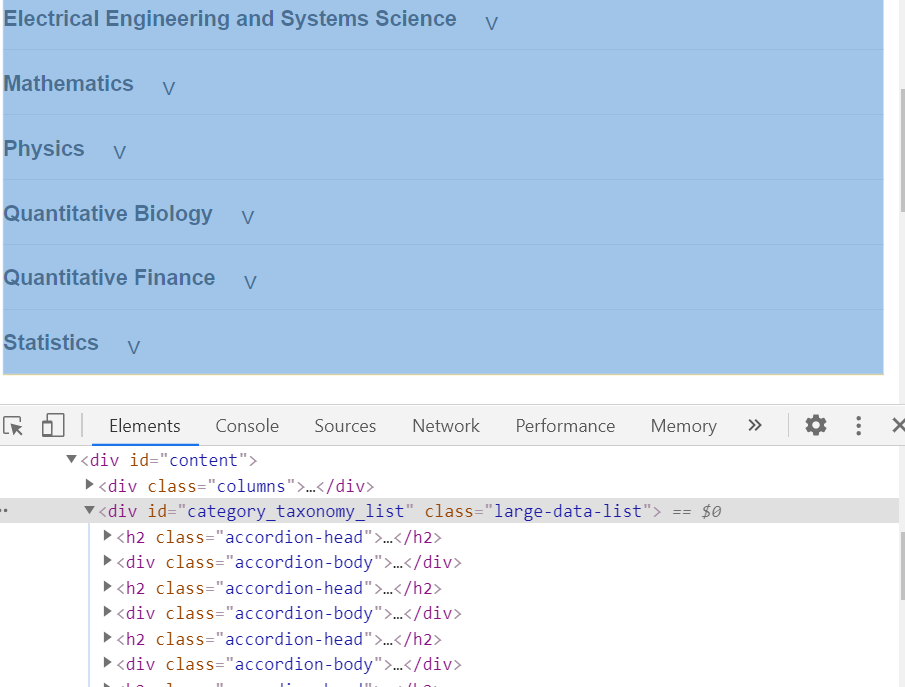

In [24]:
# 读取标签下的tags
tags = root.find_all(["h2","h3","h4","p"], recursive=True)

In [40]:
tags[3].text

'cs.AR (Hardware Architecture)'

接下来，我们需要将爬去的数据写入DataFrame:

In [41]:
# 初始化相关变量
level_1_name = ""
level_2_name = ""
level_2_code = ""
level_1_names = []
level_2_codes = []
level_2_names = []
level_3_codes = []
level_3_names = []
level_3_notes = []

# 进行写入，要理解这段代码，必须充分熟悉网页结构以及字符串格式
for t in tags:
    if t.name == "h2":
        level_1_name = t.text    
        level_2_code = t.text
        level_2_name = t.text
    elif t.name == "h3":
        raw = t.text
        level_2_code = re.sub(r"(.*)\((.*)\)",r"\2",raw) #正则表达式：模式字符串：(.*)\((.*)\)；被替换字符串"\2"；被处理字符串：raw
        level_2_name = re.sub(r"(.*)\((.*)\)",r"\1",raw)
    elif t.name == "h4":
        raw = t.text
        level_3_code = re.sub(r"(.*) \((.*)\)",r"\1",raw)
        level_3_name = re.sub(r"(.*) \((.*)\)",r"\2",raw)
    elif t.name == "p":
        notes = t.text
        level_1_names.append(level_1_name)
        level_2_names.append(level_2_name)
        level_2_codes.append(level_2_code)
        level_3_names.append(level_3_name)
        level_3_codes.append(level_3_code)
        level_3_notes.append(notes)

In [42]:
#根据以上信息生成dataframe格式的数据
df_taxonomy = pd.DataFrame({
    'group_name' : level_1_names,
    'archive_name' : level_2_names,
    'archive_id' : level_2_codes,
    'category_name' : level_3_names,
    'categories' : level_3_codes,
    'category_description': level_3_notes
    
})

In [44]:
#按照 "group_name" 进行分组，在组内使用 "archive_name" 进行排序
df_taxonomy.groupby(["group_name","archive_name"])
df_taxonomy.head(10)

,group_name,archive_name,archive_id,category_name,categories,category_description
0,Computer Science,Computer Science,Computer Science,Artificial Intelligence,cs.AI,"Covers all areas of AI except Vision, Robotics..."
1,Computer Science,Computer Science,Computer Science,Hardware Architecture,cs.AR,Covers systems organization and hardware archi...
2,Computer Science,Computer Science,Computer Science,Computational Complexity,cs.CC,"Covers models of computation, complexity class..."
3,Computer Science,Computer Science,Computer Science,"Computational Engineering, Finance, and Science",cs.CE,Covers applications of computer science to the...
4,Computer Science,Computer Science,Computer Science,Computational Geometry,cs.CG,Roughly includes material in ACM Subject Class...
5,Computer Science,Computer Science,Computer Science,Computation and Language,cs.CL,Covers natural language processing. Roughly in...
6,Computer Science,Computer Science,Computer Science,Cryptography and Security,cs.CR,Covers all areas of cryptography and security ...
7,Computer Science,Computer Science,Computer Science,Computer Vision and Pattern Recognition,cs.CV,"Covers image processing, computer vision, patt..."
8,Computer Science,Computer Science,Computer Science,Computers and Society,cs.CY,"Covers impact of computers on society, compute..."
9,Computer Science,Computer Science,Computer Science,Databases,cs.DB,"Covers database management, datamining, and da..."


### 数据分析及可视化

我们使用merge函数，以两个dataframe共同的属性 “categories” 进行合并，并以 “group_name” 作为类别进行统计，统计结果放入 “id” 列中并排序。

In [45]:
_df = data.merge(df_taxonomy, on="categories", how="left").drop_duplicates(["id","group_name"]).groupby("group_name").agg({"id":"count"}).sort_values(by="id",ascending=False).reset_index()

_df

,group_name,id
0,Physics,79985
1,Mathematics,51567
2,Computer Science,40067
3,Statistics,4054
4,Electrical Engineering and Systems Science,3297
5,Quantitative Biology,1994
6,Quantitative Finance,826
7,Economics,576


使用饼图将上述结果可视化：

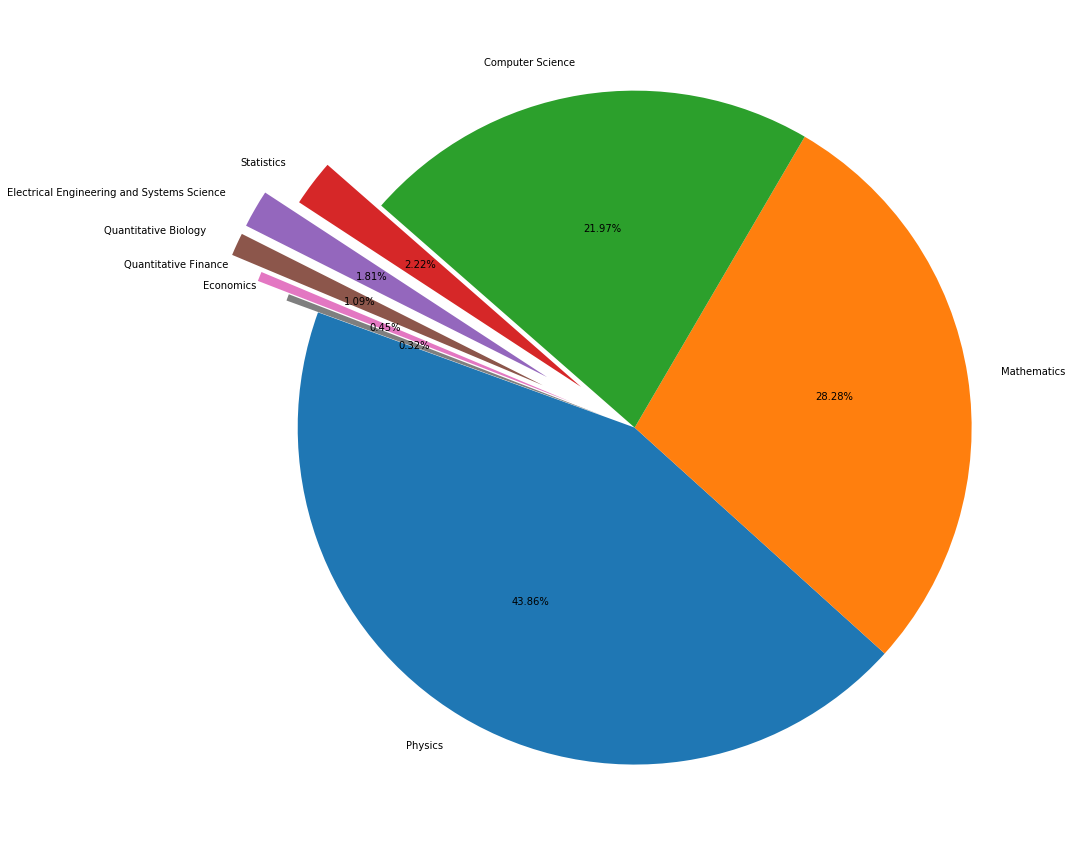

In [48]:
fig = plt.figure(figsize=(15,12))
explode = (0, 0, 0, 0.2, 0.3, 0.3, 0.2, 0.1) 
plt.pie(_df["id"],  labels=_df["group_name"], autopct='%1.2f%%', startangle=160, explode=explode)
plt.tight_layout()
plt.show()

接下来，统计各计算机子领域2019年后的paper数量：

In [51]:
group_name="Computer Science"
cats = data.merge(df_taxonomy, on="categories").query("group_name == @group_name")
cats.groupby(["year","category_name"]).count().reset_index().pivot(index="category_name", columns="year",values="id") 

year,2019,2020
category_name,,
Artificial Intelligence,558,757
Computation and Language,2153,2906
Computational Complexity,131,188
"Computational Engineering, Finance, and Science",108,205
Computational Geometry,199,216
Computer Science and Game Theory,281,323
Computer Vision and Pattern Recognition,5559,6517
Computers and Society,346,564
Cryptography and Security,1067,1238
